In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
csvfile = 'drive/My Drive/Colab Notebooks/Travel Pony Facebook.csv'
df=pd.read_csv(csvfile)

In [3]:
df.head()

,Start Date,End Date,Account,Campaign Name,Reach,Frequency,Impressions,Clicks,Unique Clicks,Amount Spent (USD),Page Likes,Page Engagement,Post Engagement,Post Likes,Post Comments,Post Shares,Photo Views,Website Clicks,Cost per Page Like (USD),Cost per Page Engagement (USD)
0,2013-12-02,2013-12-02,Bob Jackson,Cyber Weekend,278117,2.314303,643647,336,313,300.00,3,246,243,0,0,0,0,243,100.00,1.219512
1,2013-12-01,2013-12-01,Bob Jackson,Cyber Weekend,221255,2.079090,460009,376,348,300.00,6,215,209,0,0,0,0,209,50.00,1.395349
2,2013-11-30,2013-11-30,Bob Jackson,Cyber Weekend,267915,2.499069,669538,383,345,300.00,2,252,250,0,0,0,0,250,150.00,1.190476
3,2013-11-29,2013-11-29,Bob Jackson,Cyber Weekend,280332,2.365406,663099,301,275,300.00,3,257,254,0,0,0,0,254,100.00,1.167315
4,2013-11-22,2013-11-22,Bob Jackson,TravelPony: General Ads,14269,1.000420,14275,64,61,35.18,2,14,12,0,0,0,0,12,17.59,2.512857


In [0]:
#gets rid of all rows where amount spent is 0
df_new = df[(df[['Amount Spent (USD)']] != 0).all(axis=1)]

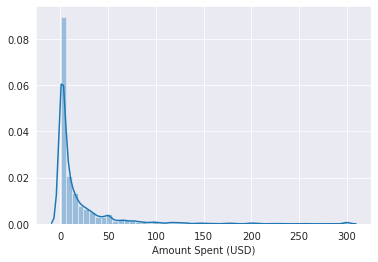

In [5]:
import seaborn as sns

sns.set_style('darkgrid')
sns.distplot(df_new['Amount Spent (USD)'])

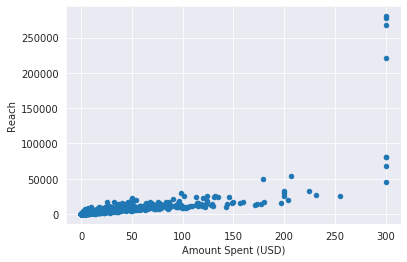

In [9]:
df_new.plot.scatter(x='Amount Spent (USD)', y='Reach')

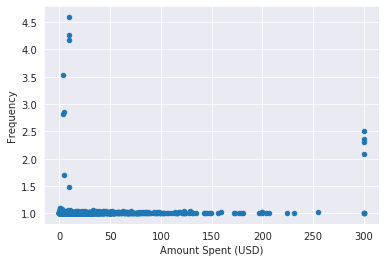

In [10]:
df_new.plot.scatter(x='Amount Spent (USD)', y='Frequency')

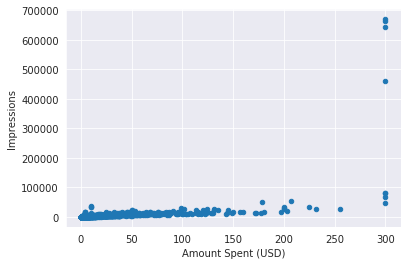

In [11]:
df_new.plot.scatter(x='Amount Spent (USD)', y='Impressions')

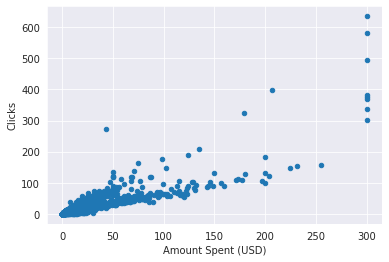

In [12]:
df_new.plot.scatter(x='Amount Spent (USD)', y='Clicks')

With these scatter plots I see an exponential relationship. Therefore I do not think that linear regression will work for this problem.

Campaign Name
Reach
Frequency
Impressions
Clicks
Unique Clicks
Page Likes
Page Engagement
Post Engagement
Post Likes
Post Comments
Post Shares
Photo Views
Website Clicks

In [0]:
import statsmodels.api as sm

In [35]:
target=df_new['Amount Spent (USD)']
indep= df_new[['Ad ','SimpleMultiFillCampaign','Post','Nanigans','Cyber Weekend','TravelPony','Reach','Frequency','Impressions', 'Clicks', 'Unique Clicks', 'Page Likes', 'Page Engagement', 'Post Engagement', 'Post Likes', 'Post Comments', 'Post Shares', 'Photo Views', 'Website Clicks']]
model= sm.OLS(target, indep).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Amount Spent (USD)   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     1360.
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        23:49:30   Log-Likelihood:                -6573.0
No. Observations:                1802   AIC:                         1.318e+04
Df Residuals:                    1784   BIC:                         1.328e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Ad                          0.0833      1.901      0.044      0.965      -3.646       3.813
Ad                          0.0833      1.901      0.044      0.965      -3.646       3.813
SimpleMultiFillCampaign    -0.0324      0.941     -0.034      0.973      -1.878       1.813
SimpleMultiFillCampaign    -0.0324      0.941     -0.034      0.973      -1.878       1.813
Post                       -6.0205      3.788     -1.589      0.112     -13.449       1.408
Post                       -6.0205      3.788     -1.589      0.112     -13.449       1.408
Nanigans                   -1.1575      1.007     -1.149      0.251      -3.133       0.818
Nanigans                   -1.1575      1.007     -1.149      0.251      -3.133       0.818
Cyber Weekend             -96.6598     13.476     -7.173      0.000    -123.089     -70.230
Cyber Weekend             -96.6598     13.476     -7.173      0.000    -123.089     -70.230
TravelPony                  3.6463      2.126      1.715      0.087      -0.524       7.816
TravelPony                  3.6463      2.126      1.715      0.087      -0.524       7.816
Reach                       0.0033      0.000     20.921      0.000       0.003       0.004
Frequency                  -0.7778      1.836     -0.424      0.672      -4.378       2.823
Impressions                -0.0009   8.41e-05    -10.146      0.000      -0.001      -0.001
Clicks                     -0.3859      0.113     -3.413      0.001      -0.608      -0.164
Unique Clicks               0.5155      0.127      4.057      0.000       0.266       0.765
Page Likes                 24.4507      9.359      2.613      0.009       6.096      42.806
Page Engagement           -21.1451      9.355     -2.260      0.024     -39.494      -2.796
Post Engagement            18.0241      7.797      2.312      0.021       2.732      33.316
Post Likes                  2.6100      1.564      1.669      0.095      -0.458       5.678
Post Comments               3.5949      1.627      2.209      0.027       0.403       6.787
Post Shares                 4.9334      1.588      3.107      0.002       1.819       8.048
Photo Views                 3.3214      1.562      2.126      0.034       0.257       6.385
Website Clicks              3.5644      1.563      2.281      0.023       0.500       6.629
==============================================================================
Omnibus:                      796.064   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21680.838
Skew:                           1.484   Prob(JB):                         0.00
Kurtosis:                      19.732   Cond. No.                     2.89e+21
==============================================================================

Warnings:
[1] Standard Errors as

In [0]:
df_new['Campaign Name'] = df_new['Campaign Name'].astype('str')
df_new['Campaign Name'] = df_new['Campaign Name'].str.replace('[^a-zA-Z0-9:\s+]', '')
df_new['Campaign Name'] = df_new['Campaign Name'].str.replace('\d+', '')
df_new.loc[df_new['Campaign Name'].str.contains('travelpony', case = False), 'Campaign Name'] = 'TravelPony'
df_new.loc[df_new['Campaign Name'].str.contains('post', case = False), 'Campaign Name'] = 'Post'
campaign_name = pd.get_dummies(df_new['Campaign Name'])
df_new = pd.concat([df_new, campaign_name], axis=1)

In [28]:
df_new['Campaign Name']

0       Cyber Weekend
1       Cyber Weekend
2       Cyber Weekend
3       Cyber Weekend
4          TravelPony
            ...      
3700              Ad 
3701              Ad 
3702              Ad 
3703              Ad 
3704              Ad 
Name: Campaign Name, Length: 1802, dtype: object

In [37]:
ModelSummary = []
ModelSummary = pd.concat([model.params, model.pvalues, ],axis=1)
ModelSummary.columns = ['Coef', 'Pvalue']
ModelSummary = ModelSummary[ModelSummary['Pvalue'] <= 0.05].sort_values('Coef', ascending = False)
ModelSummary['Rank'] = ModelSummary['Coef'].rank(ascending=0).astype(int)
ModelSummary.head(3)

,Coef,Pvalue,Rank
Page Likes,24.450740,0.009060,1
Post Engagement,18.024142,0.020907,2
Post Shares,4.933423,0.001920,3


Variables with p-value greater than 0.05 are not significant and therefore were removed. The three predictors with the highest coefficient values were Page Likes(24.451), Post Enagementment(18.024), Post Shares(4.933).